In [1]:
from google.colab import files
import pandas as pd

df = pd.read_csv('bodyPerformance.csv')
df.head()


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [2]:
!pip install igraph

!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.3 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.cluster import DBSCAN, MeanShift
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph

from sklearn.cluster import AgglomerativeClustering, MeanShift, Birch

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df.shape

(13393, 12)

In [4]:
for col in df.columns:
  print(f'{col}: {df[col].nunique()}')


age: 44
gender: 2
height_cm: 467
weight_kg: 1398
body fat_%: 527
diastolic: 89
systolic: 102
gripForce: 550
sit and bend forward_cm: 528
sit-ups counts: 81
broad jump_cm: 245
class: 4


In [5]:
# prompt: תיצור דאטה סט חדש וזהה לdf
# רק שאצלו בעמודת גילאים תחלק את הגילאים ל-3 קבוצות ותמסר כל דגימה ב1,2,3
# 1 - טווח בין 21 ל-33
# להשמיט 34-35
# 2- טווח 36-48
# ללהשמיט 49-50
# 3- 51+

import pandas as pd

# Assuming df is already defined from the previous code block

def categorize_age(age):
  if 21 <= age <= 33:
    return 1
  elif 36 <= age <= 48:
    return 2
  elif age >= 51:
    return 3
  else:
    return None  # Handle ages outside the defined ranges

# Create a new column 'AgeCategory' based on the categorization function
df['AgeCategory'] = df['age'].apply(categorize_age)

# Create a copy of the DataFrame
new_df = df.copy()

# Remove rows with NaN in the AgeCategory column (ages outside specified ranges)
new_df = new_df.dropna(subset=['AgeCategory'])

# Convert 'AgeCategory' to integer type
new_df['AgeCategory'] = new_df['AgeCategory'].astype(int)

# Display the first few rows of the new DataFrame
print(new_df.head())


   age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0   27      M      172.3      75.24        21.3       80.0     130.0   
1   25      M      165.0      55.80        15.7       77.0     126.0   
2   31      M      179.6      78.00        20.1       92.0     152.0   
3   32      M      174.5      71.10        18.4       76.0     147.0   
4   28      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  \
0       54.9                     18.4            60.0          217.0     C   
1       36.4                     16.3            53.0          229.0     A   
2       44.8                     12.0            49.0          181.0     C   
3       41.4                     15.2            53.0          219.0     B   
4       43.5                     27.1            45.0          217.0     B   

   AgeCategory  
0            1  
1            1  
2            1  
3            1  
4            

In [8]:
new_df.shape

(12589, 13)

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['class', 'gender', 'AgeCategory']

numeric_features = ['height_cm','weight_kg','body fat_%','diastolic',
 'systolic','gripForce','sit and bend forward_cm','sit-ups counts','broad jump_cm',]  # שמות הנומריים

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

X_encoded = preprocessor.fit_transform(new_df)

In [7]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


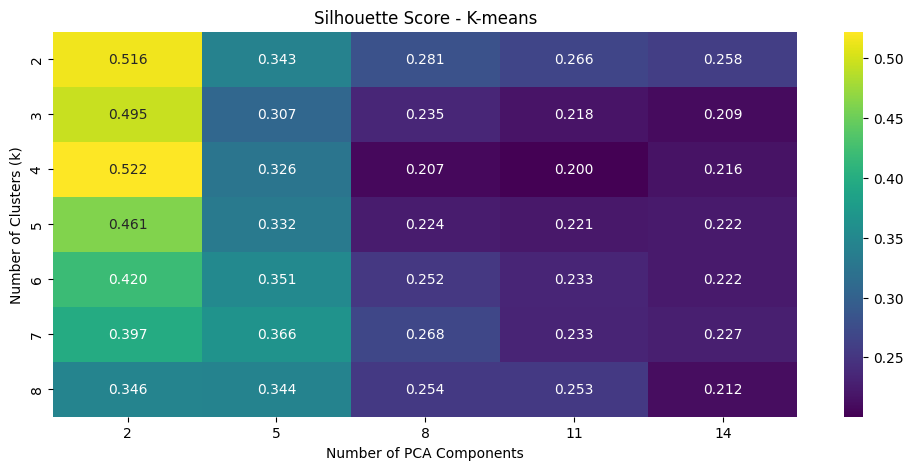

In [289]:
results = []

for n_dims in range(2, 15, 3):  # 2 עד 12 ממדים
    X_pca = PCA(n_components=n_dims).fit_transform(X_scaled)
    for k in range(2, 9):  # 2 עד 10 קלאסטרים
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_pca)
        score = silhouette_score(X_pca, labels)
        results.append({'dims': n_dims, 'k': k, 'silhouette': score})

# 📊 יצירת DataFrame ו-Heatmap
results_df = pd.DataFrame(results)
heatmap_data = results_df.pivot(index='k', columns='dims', values='silhouette')


plt.figure(figsize=(12, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='viridis')
plt.title('Silhouette Score - K-means')
plt.xlabel('Number of PCA Components')
plt.ylabel('Number of Clusters (k)')
plt.show()

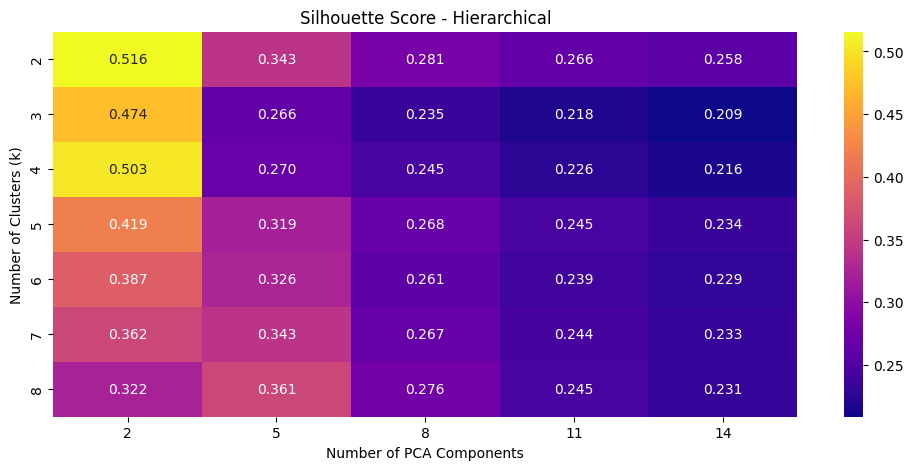

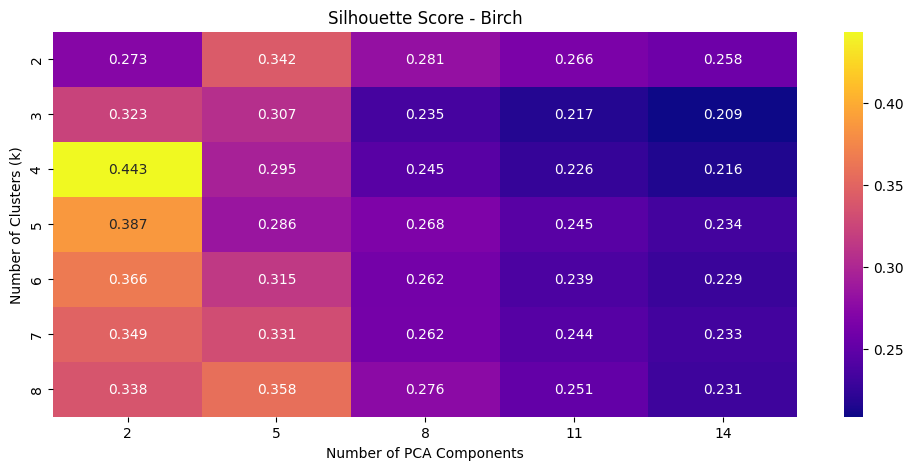

In [290]:
results = []

for n_dims in range(2, 15, 3):  # לדוגמה: 2, 5, 8, 11, 14
    X_pca = PCA(n_components=n_dims).fit_transform(X_scaled)

    # Hierarchical (Agglomerative)
    for k in range(2, 9):
        model = AgglomerativeClustering(n_clusters=k)
        labels = model.fit_predict(X_pca)
        score = silhouette_score(X_pca, labels)
        results.append({'dims': n_dims, 'k': k, 'silhouette': score, 'method': 'Hierarchical'})

    # Birch
    for k in range(2, 9):
        model = Birch(n_clusters=k)
        labels = model.fit_predict(X_pca)
        score = silhouette_score(X_pca, labels)
        results.append({'dims': n_dims, 'k': k, 'silhouette': score, 'method': 'Birch'})

# 📊 יצירת DataFrame וציור Heatmaps נפרדים לכל שיטה
results_df = pd.DataFrame(results)

for method in results_df['method'].unique():
    method_df = results_df[results_df['method'] == method]
    heatmap_data = method_df.pivot(index='k', columns='dims', values='silhouette')

    plt.figure(figsize=(12, 5))
    sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='plasma')
    plt.title(f'Silhouette Score - {method}')
    plt.xlabel('Number of PCA Components')
    plt.ylabel('Number of Clusters (k)')
    plt.show()

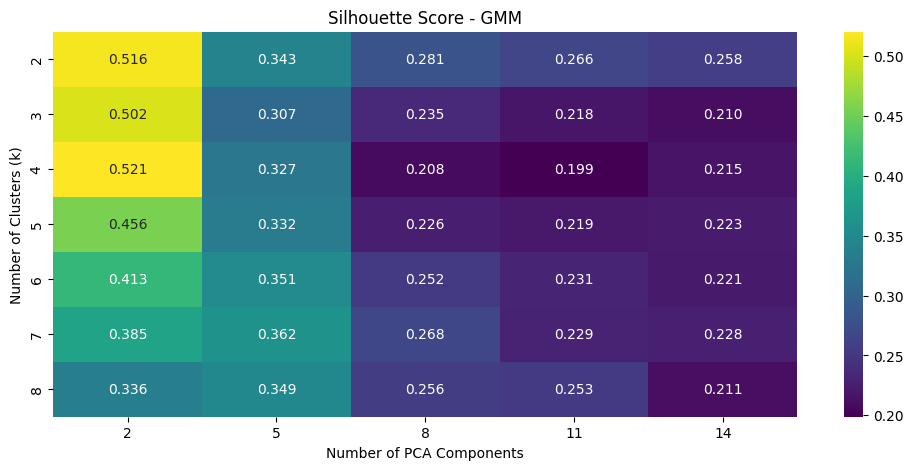

In [291]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

results = []

for n_dims in range(2, 15, 3):  # 2 עד 12 ממדים
    X_pca = PCA(n_components=n_dims).fit_transform(X_scaled)
    for k in range(2, 9):  # 2 עד 8 קלאסטרים
        gmm = GaussianMixture(n_components=k, random_state=42)
        labels = gmm.fit_predict(X_pca)
        score = silhouette_score(X_pca, labels)
        results.append({'dims': n_dims, 'k': k, 'silhouette': score})

# 📊 יצירת DataFrame ו-Heatmap
results_df = pd.DataFrame(results)
heatmap_data = results_df.pivot(index='k', columns='dims', values='silhouette')

plt.figure(figsize=(12, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='viridis')
plt.title('Silhouette Score - GMM')
plt.xlabel('Number of PCA Components')
plt.ylabel('Number of Clusters (k)')
plt.show()

In [292]:
# prompt: תשתמש ב
# x_scaled
# שזה
# one-hot-vector
#  בצורה אקראית וכעת תחלק את כל אלו ל15 קבוצות שוות בגודלן

import numpy as np

# Assuming x_scaled is already defined from the previous code block

# Shuffle the data randomly
np.random.shuffle(X_scaled)

# Calculate the size of each group
group_size = len(X_scaled) // 25

# Split the data into 15 equal-sized groups
groups = []
for i in range(25):
    start_index = i * group_size
    end_index = (i + 1) * group_size if i < 14 else len(X_scaled)  # Handle the last group
    groups.append(X_scaled[start_index:end_index])

# Now 'groups' is a list containing 15 NumPy arrays, each representing a group.
# You can access each group using groups[i], where i is the group number (0 to 14).


12589


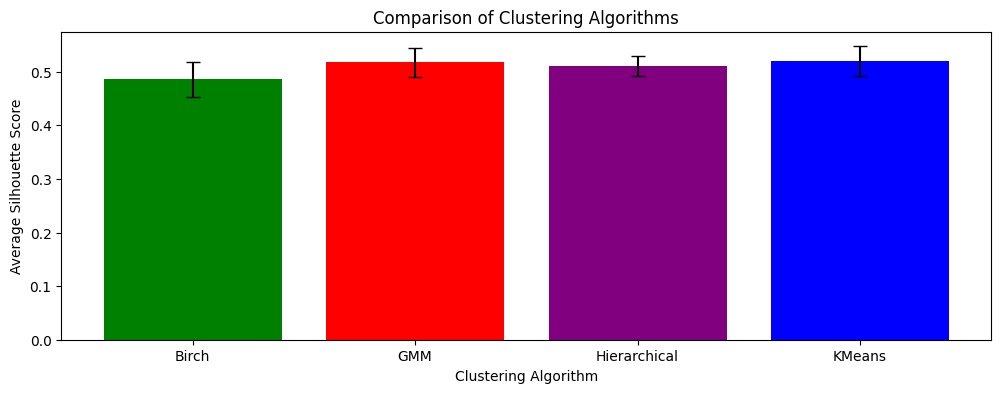

In [293]:
# prompt: כעת תחשב עבור 2 מימדים ו-4 קלאסטרים
# את הממוצע של מדד הצללית לפי אלגוריתם K-means
# ממוצע של הפעלת האלגוריתם על כל קבוצה בנפרד
# 15 הקבוצות שיצרנו קודם
# תעשה גרף שמציג את הממוצע והשונות
# באותו גרף את עושה בדיוק מה שעושים עם
# K-means
# תו
# birch - 2 מימדים ו4 קלאסטרים
# GMM - 2 מימדים ו4 קלאסטרים
# אלגוריתם היררכיים heirarichical 2 מימדים 2 קלאסטרים
# תציג בצורה ברורה ובמבט קרוב לפערים בין האלגוריתמים ובנוסף תעשה כל אלגוריתם בצבע שונה

import matplotlib.pyplot as plt

# Assuming 'groups' and 'X_scaled' are defined from the previous code block
print(len(X_scaled))
results = []
# KMeans
for group in groups:
    X_pca = PCA(n_components=2).fit_transform(group)
    kmeans = KMeans(n_clusters=4, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    results.append({'method': 'KMeans', 'silhouette': score})

# BIRCH
for group in groups:
    X_pca = PCA(n_components=2).fit_transform(group)
    birch = Birch(n_clusters=4)
    labels = birch.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    results.append({'method': 'Birch', 'silhouette': score})

# GMM
for group in groups:
    X_pca = PCA(n_components=2).fit_transform(group)
    gmm = GaussianMixture(n_components=4, random_state=42)
    labels = gmm.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    results.append({'method': 'GMM', 'silhouette': score})

# Hierarchical Clustering
for group in groups:
    X_pca = PCA(n_components=2).fit_transform(group)
    agg_clustering = AgglomerativeClustering(n_clusters=2)
    labels = agg_clustering.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    results.append({'method': 'Hierarchical', 'silhouette': score})

results_df = pd.DataFrame(results)

# Calculate mean and standard deviation for each method
method_stats = results_df.groupby('method')['silhouette'].agg(['mean', 'std'])

# Create the plot
plt.figure(figsize=(12, 4))
colors = {'KMeans': 'blue', 'Birch': 'green', 'GMM': 'red', 'Hierarchical': 'purple'}

for method, row in method_stats.iterrows():
  plt.bar(method, row['mean'], yerr=row['std'], color=colors[method], capsize=5)

plt.xlabel("Clustering Algorithm")
plt.ylabel("Average Silhouette Score")
plt.title("Comparison of Clustering Algorithms")
plt.show()


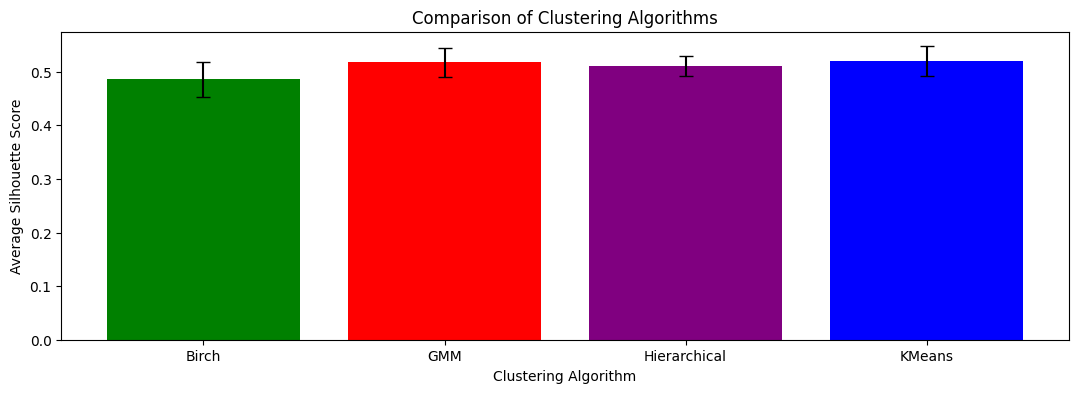

In [294]:
# prompt: תעשה את אותו הגרף עם התוצאות שכבר יש לנו
# הפעם שיהיה גרף יותר רחב ופחות ארוך

plt.figure(figsize=(13, 4))  # Increased width, decreased height
colors = {'KMeans': 'blue', 'Birch': 'green', 'GMM': 'red', 'Hierarchical': 'purple'}

for method, row in method_stats.iterrows():
  plt.bar(method, row['mean'], yerr=row['std'], color=colors[method], capsize=5)

plt.xlabel("Clustering Algorithm")
plt.ylabel("Average Silhouette Score")
plt.title("Comparison of Clustering Algorithms")
plt.show()


In [295]:
# prompt: תיצור טבלה בה כתוב מהאיטראציה הקודמת מה הממוצע של כל אלגוריתם ומה השונות

# Assuming 'results_df' from the previous code block is available

# Calculate mean and standard deviation for each method
method_stats = results_df.groupby('method')['silhouette'].agg(['mean', 'std'])

# Display the results in a table
method_stats


,mean,std
method,,
Birch,0.485638,0.031919
GMM,0.517838,0.027175
Hierarchical,0.510641,0.018692
KMeans,0.520018,0.027377


In [296]:
# prompt: תבצע מבחן
# anova
# על התוצאות האחרונות של-
# GMM, K-MEANS, HEIRICICHICAL
# ואז תעשה טבלה עם t-test
# להראות רק
# p-value
# בין כל 2 משתנים מבין השלושה
# לא כולל birch

import pandas as pd
from scipy import stats

# Assuming results_df is already defined from the previous code block
kmeans_scores = results_df[results_df['method'] == 'KMeans']['silhouette']
gmm_scores = results_df[results_df['method'] == 'GMM']['silhouette']
hierarchical_scores = results_df[results_df['method'] == 'Hierarchical']['silhouette']

# Perform ANOVA
fvalue, pvalue = stats.f_oneway(kmeans_scores, gmm_scores, hierarchical_scores)
print(f"ANOVA p-value: {pvalue}")

# Perform pairwise t-tests
def perform_t_test(group1, group2):
  t_statistic, p_value = stats.ttest_ind(group1, group2)
  return p_value

# Create a dictionary to store p-values
p_values = {
    'KMeans vs GMM': perform_t_test(kmeans_scores, gmm_scores),
    'KMeans vs Hierarchical': perform_t_test(kmeans_scores, hierarchical_scores),
    'GMM vs Hierarchical': perform_t_test(gmm_scores, hierarchical_scores)
}

# Create a DataFrame for p-values
p_value_df = pd.DataFrame(list(p_values.items()), columns=['Comparison', 'p-value'])
print("\nPairwise t-test p-values:")
p_value_df


ANOVA p-value: 0.3791682656631138

Pairwise t-test p-values:


,Comparison,p-value
0,KMeans vs GMM,0.778779
1,KMeans vs Hierarchical,0.163712
2,GMM vs Hierarchical,0.280669


In [297]:
# prompt: תעשה ותציג בדיקות t-test
# בין האלגוריתמים לבין האלגוריתם brich
# באופן ספציפי

# Assuming results_df is already defined from the previous code block
birch_scores = results_df[results_df['method'] == 'Birch']['silhouette']
kmeans_scores = results_df[results_df['method'] == 'KMeans']['silhouette']
gmm_scores = results_df[results_df['method'] == 'GMM']['silhouette']
hierarchical_scores = results_df[results_df['method'] == 'Hierarchical']['silhouette']

# Perform pairwise t-tests
def perform_t_test(group1, group2):
  t_statistic, p_value = stats.ttest_ind(group1, group2)
  return p_value

# Create a dictionary to store p-values
p_values = {
    'Birch vs KMeans': perform_t_test(birch_scores, kmeans_scores),
    'Birch vs GMM': perform_t_test(birch_scores, gmm_scores),
    'Birch vs Hierarchical': perform_t_test(birch_scores, hierarchical_scores),
}

# Create a DataFrame for p-values
p_value_df = pd.DataFrame(list(p_values.items()), columns=['Comparison', 'p-value'])
print("\nPairwise t-test p-values:")
p_value_df



Pairwise t-test p-values:


,Comparison,p-value
0,Birch vs KMeans,0.000165
1,Birch vs GMM,0.000359
2,Birch vs Hierarchical,0.001449


In [298]:
# prompt: תחשב אינפורמציה הדדית
# בין אלגוריתם
# k-means
# לשלושת הערכים הקטגוריים -
# גיל, מגדר, רמה
# האינפורמציה חייבת להתבצע מX_scaled
# ל -
# X_scaled

from sklearn.metrics import mutual_info_score

# Assuming X_scaled and the categorical features are available

# Extract the one-hot encoded categorical features from X_scaled
# Assuming the order of features in X_scaled corresponds to the order in preprocessor.transformers
categorical_indices = [i for i, (name, transformer, features) in enumerate(preprocessor.transformers_) if name == 'cat']
categorical_indices = categorical_indices[0]

ohe_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
num_ohe_features = len(ohe_features)
categorical_data = X_scaled[:, :num_ohe_features]


# Assuming kmeans labels are already computed (from a previous code block)
kmeans = KMeans(n_clusters=4, random_state=42) # Example, replace with your actual KMeans model
X_pca = PCA(n_components=2).fit_transform(X_scaled) # Example PCA, replace if you used different params
kmeans_labels = kmeans.fit_predict(X_pca)


# Calculate mutual information for each categorical feature
for i in range(len(categorical_features)):
  mi = mutual_info_score(kmeans_labels, categorical_data[:,i])
  print(f"Mutual Information between k-means labels and {categorical_features[i]}: {mi}")


Mutual Information between k-means labels and class: 0.03698971277021425
Mutual Information between k-means labels and gender: 0.0017020250287387018
Mutual Information between k-means labels and AgeCategory: 0.0018436395312670384


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


12589


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/loc

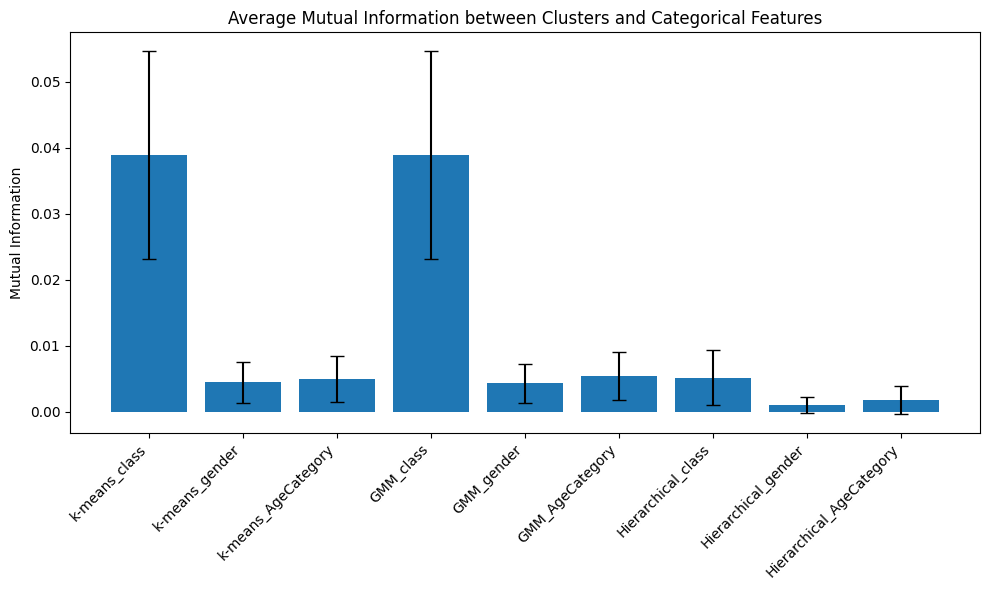

In [299]:
# prompt: תיקח את
# X_scaled
# תחלק אותו ל20 קבוצות
# אחר כך תריץ על כל קבוצה את האלגוריתמים:
# k-means 4 קלאסטרים
# GMM 4 קלאסטרים
# heirichical 2 קלאסטרים
# תמדוד על כל קבוצה את האינפורמציה ההדדית בין האלגוריתם לבין שלושת המשתנים הקטגוריים כל אחד בנפרד -
# גיל, רמה, מגדר
# תציג בגרף עם עמודה של המשתנים הקטגוריים
#  את הממוצע של האינפורמציה ההדדית עם האלגוריתמים והשונות
# גם
# שהכל יחושב בין
# x_scaled
# ל-
# x_scaled
# תציג בגרף

# Assuming X_scaled, categorical_features, and preprocessor are defined from the previous code block
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mutual_info_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print(len(X_scaled))
# Split data into 20 groups
np.random.shuffle(X_scaled)
group_size = len(X_scaled) // 20
groups = [X_scaled[i * group_size:(i + 1) * group_size] for i in range(20)]


# Extract one-hot encoded categorical features
categorical_indices = [i for i, (name, _, _) in enumerate(preprocessor.transformers_) if name == 'cat'][0]
ohe_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
num_ohe_features = len(ohe_features)
categorical_data = X_scaled[:, :num_ohe_features]


mutual_info_results = []
for i, group in enumerate(groups):
  group_results = {}
  X_pca = PCA(n_components=2).fit_transform(group)

  # k-means
  kmeans = KMeans(n_clusters=4, random_state=42)
  kmeans_labels = kmeans.fit_predict(X_pca)
  for j, feature in enumerate(categorical_features):
    mi = mutual_info_score(kmeans_labels, categorical_data[i*group_size:(i+1)*group_size, j])
    group_results[f'k-means_{feature}'] = mi

  # GMM
  gmm = GaussianMixture(n_components=4, random_state=42)
  gmm_labels = gmm.fit_predict(X_pca)
  for j, feature in enumerate(categorical_features):
    mi = mutual_info_score(gmm_labels, categorical_data[i*group_size:(i+1)*group_size, j])
    group_results[f'GMM_{feature}'] = mi

  # Hierarchical clustering
  hierarchical = AgglomerativeClustering(n_clusters=2)
  hierarchical_labels = hierarchical.fit_predict(X_pca)
  for j, feature in enumerate(categorical_features):
      mi = mutual_info_score(hierarchical_labels, categorical_data[i*group_size:(i+1)*group_size, j])
      group_results[f'Hierarchical_{feature}'] = mi

  mutual_info_results.append(group_results)


mutual_info_df = pd.DataFrame(mutual_info_results)
mi_means = mutual_info_df.mean()
mi_stds = mutual_info_df.std()


plt.figure(figsize=(10, 6))
plt.bar(mi_means.index, mi_means.values, yerr=mi_stds.values, capsize=5)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mutual Information')
plt.title('Average Mutual Information between Clusters and Categorical Features')
plt.tight_layout()
plt.show()


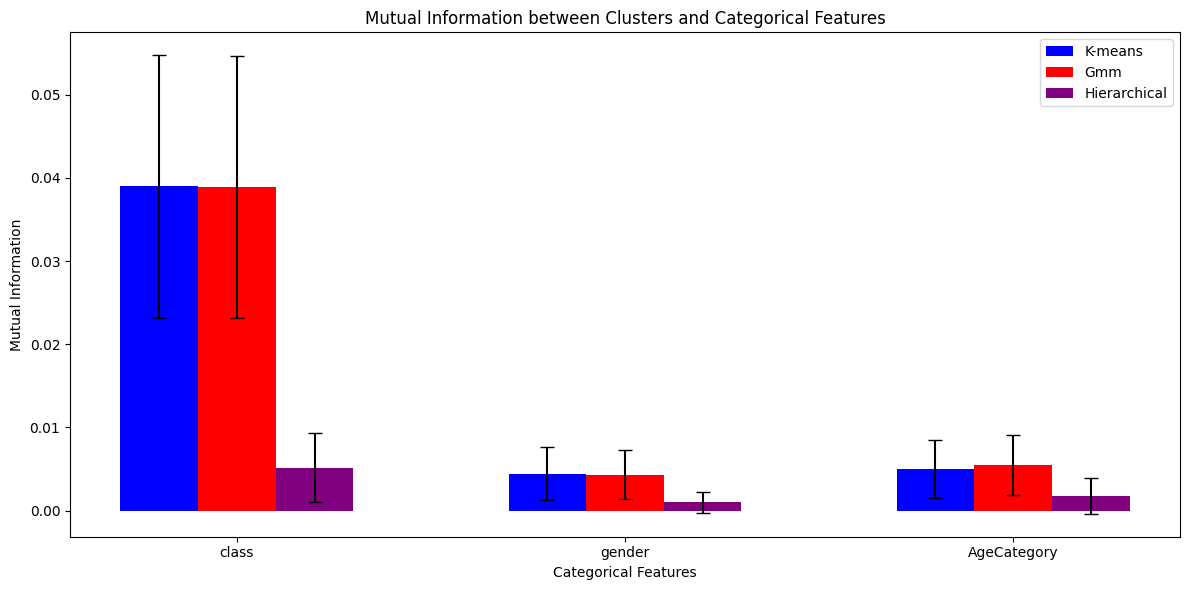

In [300]:
# prompt: תציג את הגרף האחרון של האינפורמציה ההדדית בצורה שונה
# עמודה למשתנים הקטגוריים ומלבן נפרד לכל אלגוריתם עם צבע אחר

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size for better readability

bar_width = 0.2
index = np.arange(len(categorical_features))

colors = {'k-means': 'blue', 'GMM': 'red', 'Hierarchical': 'purple'}

for i, algorithm in enumerate(['k-means', 'GMM', 'Hierarchical']):
    mi_values = [mi_means[f'{algorithm}_{feature}'] for feature in categorical_features]
    mi_errors = [mi_stds[f'{algorithm}_{feature}'] for feature in categorical_features]
    plt.bar(index + i * bar_width, mi_values, bar_width, label=algorithm.capitalize(), yerr=mi_errors, capsize=5, color=colors[algorithm])

plt.xlabel('Categorical Features')
plt.ylabel('Mutual Information')
plt.title('Mutual Information between Clusters and Categorical Features')
plt.xticks(index + bar_width, categorical_features)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


12589


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

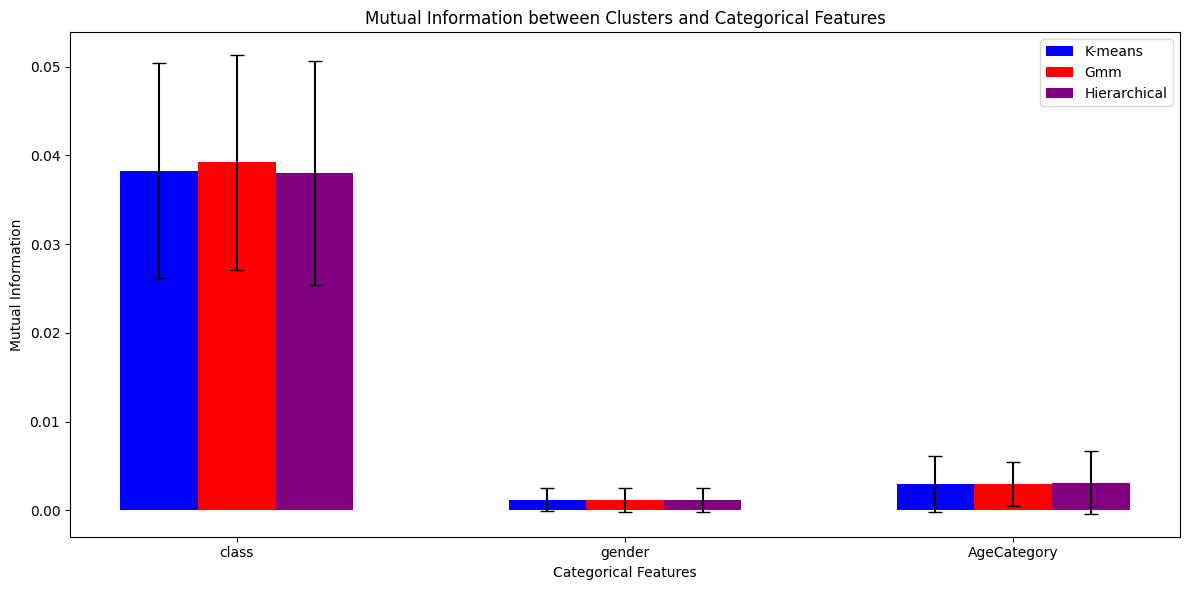

In [301]:
# prompt: תעשה בדיוק אותו דבר רק שהפעם הקלאסטרים מותאמים למספר הערכים של כל משתנה קטגורי בנפרד

# Assuming X_scaled, categorical_features, and preprocessor are defined from the previous code block

# Split data into 20 groups
print(len(X_scaled))
np.random.shuffle(X_scaled)
group_size = len(X_scaled) // 20
groups = [X_scaled[i * group_size:(i + 1) * group_size] for i in range(20)]

# Extract one-hot encoded categorical features
categorical_indices = [i for i, (name, _, _) in enumerate(preprocessor.transformers_) if name == 'cat'][0]
ohe_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
num_ohe_features = len(ohe_features)
categorical_data = X_scaled[:, :num_ohe_features]


mutual_info_results = []
for i, group in enumerate(groups):
    group_results = {}
    X_pca = PCA(n_components=2).fit_transform(group)

    # k-means
    kmeans = KMeans(n_clusters=4, random_state=42) # Use different n_clusters for each categorical feature
    kmeans_labels = kmeans.fit_predict(X_pca)
    for j, feature in enumerate(categorical_features):
        # Determine the number of unique values for the current categorical feature in the group
        unique_vals = np.unique(new_df[feature][i*group_size:(i+1)*group_size])
        n_clusters_feature = len(unique_vals)
        kmeans_feature = KMeans(n_clusters=min(n_clusters_feature, 4), random_state=42) # Use unique values as n_clusters
        kmeans_labels = kmeans_feature.fit_predict(X_pca)
        mi = mutual_info_score(kmeans_labels, categorical_data[i*group_size:(i+1)*group_size, j])
        group_results[f'k-means_{feature}'] = mi

    # Add similar code for GMM and Hierarchical clustering, using adjusted n_components or n_clusters

    # GMM
    for j, feature in enumerate(categorical_features):
        unique_vals = np.unique(new_df[feature][i*group_size:(i+1)*group_size])
        n_components_feature = len(unique_vals)
        gmm = GaussianMixture(n_components=min(n_components_feature, 4), random_state=42)
        gmm_labels = gmm.fit_predict(X_pca)
        mi = mutual_info_score(gmm_labels, categorical_data[i*group_size:(i+1)*group_size, j])
        group_results[f'GMM_{feature}'] = mi

    # Hierarchical clustering
    for j, feature in enumerate(categorical_features):
        unique_vals = np.unique(new_df[feature][i*group_size:(i+1)*group_size])
        n_clusters_feature = len(unique_vals)
        hierarchical = AgglomerativeClustering(n_clusters=min(n_clusters_feature, 4))
        hierarchical_labels = hierarchical.fit_predict(X_pca)
        mi = mutual_info_score(hierarchical_labels, categorical_data[i*group_size:(i+1)*group_size, j])
        group_results[f'Hierarchical_{feature}'] = mi

    mutual_info_results.append(group_results)

mutual_info_df = pd.DataFrame(mutual_info_results)
mi_means = mutual_info_df.mean()
mi_stds = mutual_info_df.std()

# ... (rest of the plotting code remains the same)
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability

bar_width = 0.2
index = np.arange(len(categorical_features))

colors = {'k-means': 'blue', 'GMM': 'red', 'Hierarchical': 'purple'}

for i, algorithm in enumerate(['k-means', 'GMM', 'Hierarchical']):
    mi_values = [mi_means[f'{algorithm}_{feature}'] for feature in categorical_features]
    mi_errors = [mi_stds[f'{algorithm}_{feature}'] for feature in categorical_features]
    plt.bar(index + i * bar_width, mi_values, bar_width, label=algorithm.capitalize(), yerr=mi_errors, capsize=5, color=colors[algorithm])

plt.xlabel('Categorical Features')
plt.ylabel('Mutual Information')
plt.title('Mutual Information between Clusters and Categorical Features')
plt.xticks(index + bar_width, categorical_features)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

12589


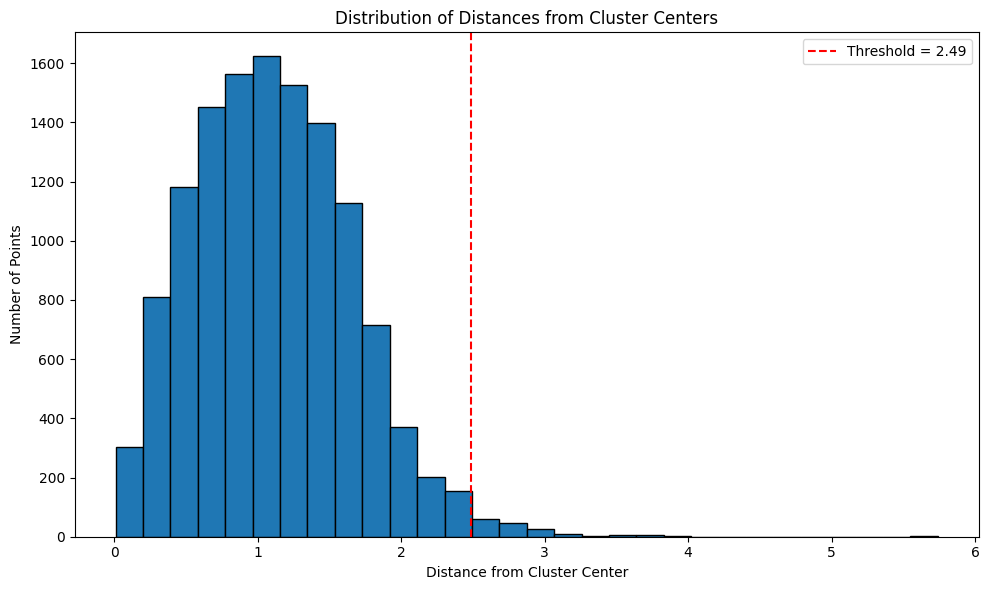

Detected 166 anomalies out of 12589 (1.32%)


In [31]:
# prompt: We will run the k-means algorithm with 4 clusters and find the cluster centers.
# For each point/sample, we will calculate the distance from its cluster center.
# We will display on a graph, one column with the distance of points from their cluster center and a second column with the frequency.
# Now we will also find the mean and std of the distances of points from their cluster center.
# And anomalies are anything beyond the range - mean + 3*std
# We will put a dashed line on the graph showing where to cut off points.
# And we will also calculate the percentage of anomalies from the entire dataset.
# use the dataset we used before
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

print(len(X_scaled))
# נניח ש-X_scaled כבר קיים
X_pca = PCA(n_components=2).fit_transform(X_scaled)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_pca)

# חישוב מרחקים מהמרכז של האשכול
centers = kmeans.cluster_centers_
distances = np.linalg.norm(X_pca - centers[labels], axis=1)

# סף לחריגים: ממוצע + 3 סטיות תקן
mean_dist = np.mean(distances)
std_dist = np.std(distances)
threshold = mean_dist + 2.5 * std_dist

# ציור היסטוגרמה של המרחקים
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=30, edgecolor='black')
plt.axvline(x=threshold, color='red', linestyle='--', label=f"Threshold = {threshold:.2f}")
plt.xlabel("Distance from Cluster Center")
plt.ylabel("Number of Points")
plt.title("Distribution of Distances from Cluster Centers")
plt.legend()
plt.tight_layout()
plt.show()

# זיהוי חריגים
anomalies_k = distances > threshold
percentage = np.mean(anomalies_k) * 100
print(f"Detected {np.sum(anomalies_k)} anomalies out of {len(distances)} ({percentage:.2f}%)")



if not isinstance(X_scaled, pd.DataFrame):
    X_scaled_df = pd.DataFrame(X_scaled)
else:
    X_scaled_df = X_scaled.copy()

# הוספת עמודה: 1 = אנומליה, 0 = תקין
X_scaled_with_anomaly = X_scaled_df.copy()
X_scaled_with_anomaly['anomaly_kmeans'] = anomalies_k.astype(int)

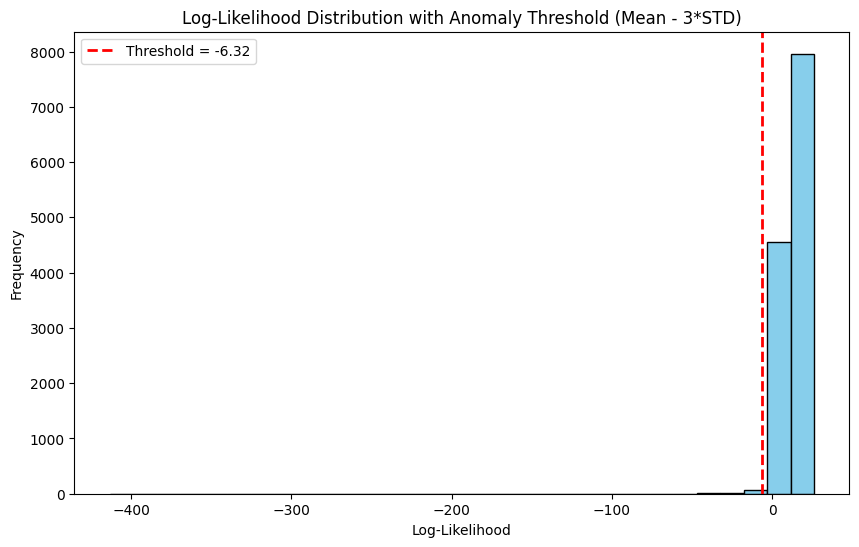

Detected 59 anomalies out of 12589 (0.47%)


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# אימון GMM
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gmm.fit(X_scaled)

# חישוב log-likelihood
log_probs = gmm.score_samples(X_scaled)

# חישוב סף לפי ממוצע וסטיית תקן
mean_lp = np.mean(log_probs)
std_lp = np.std(log_probs)
threshold = mean_lp - 2.5 * std_lp

# זיהוי חריגים
anomalies_gmm = log_probs < threshold

# ציור גרף התפלגות log-likelihood עם קו סף
plt.figure(figsize=(10, 6))
plt.hist(log_probs, bins=30, color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold = {threshold:.2f}')
plt.xlabel('Log-Likelihood')
plt.ylabel('Frequency')
plt.title('Log-Likelihood Distribution with Anomaly Threshold (Mean - 3*STD)')
plt.legend()
plt.show()

# הדפסת אחוז חריגים
print(f"Detected {np.sum(anomalies_gmm)} anomalies out of {len(X_scaled)} ({np.mean(anomalies)*100:.2f}%)")



X_scaled_with_anomaly['anomaly_gmm'] = anomalies_gmm.astype(int)

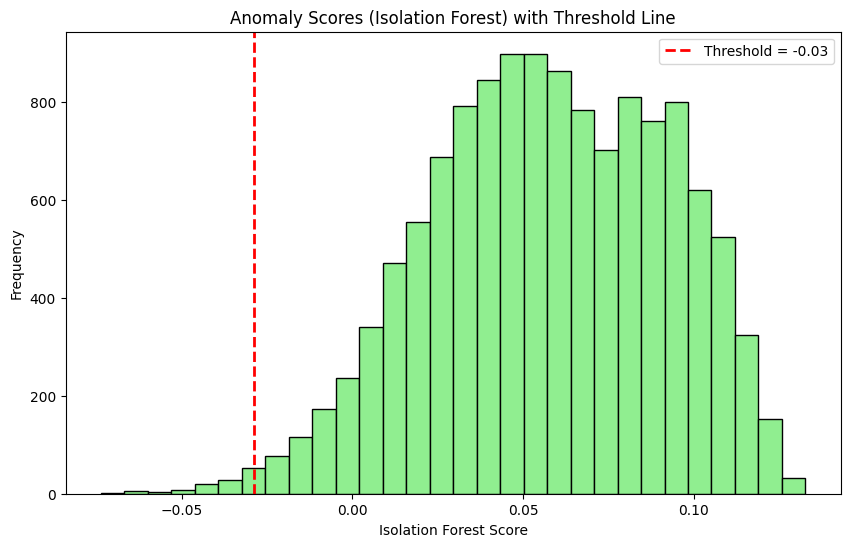

Detected 94 anomalies out of 12589 (0.75%)


In [33]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.05, random_state=42)
clf.fit(X_scaled)

# קבלת ציונים (ככל שקטן יותר → יותר חריג)
scores = clf.decision_function(X_scaled)

# חישוב סף לחריגות
mean_score = np.mean(scores)
std_score = np.std(scores)
threshold = mean_score - 2.5 * std_score

# ציור גרף היסטוגרמה
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=30, color='lightgreen', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold = {threshold:.2f}')
plt.xlabel('Isolation Forest Score')
plt.ylabel('Frequency')
plt.title('Anomaly Scores (Isolation Forest) with Threshold Line')
plt.legend()
plt.show()

# חישוב והצגת אחוז האנומליות
anomalies_if = scores < threshold
print(f"Detected {np.sum(anomalies_if)} anomalies out of {len(X_scaled)} ({np.mean(anomalies_if)*100:.2f}%)")



X_scaled_with_anomaly['anomaly_iforest'] = anomalies_if.astype(int)

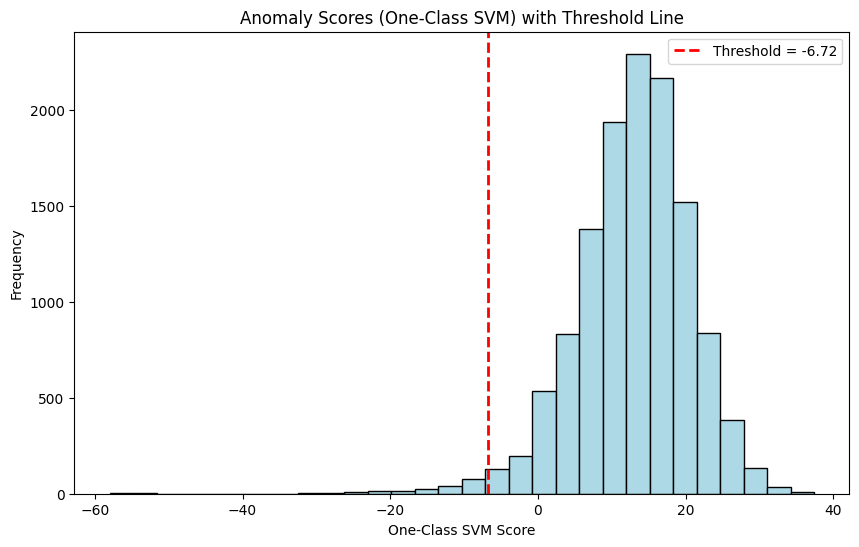

Detected 203 anomalies out of 12589 (1.61%)


In [34]:
from sklearn.svm import OneClassSVM

svm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.05)  # nu = אחוז משוער של חריגים
svm.fit(X_scaled)

# חישוב ציוני decision_function
scores = svm.decision_function(X_scaled).ravel()  # ככל שקטן יותר → חריג יותר

# סף לפי mean - 3*std
mean_score = np.mean(scores)
std_score = np.std(scores)
threshold = mean_score - 2.5 * std_score

# ציור היסטוגרמה
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=30, color='lightblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold = {threshold:.2f}')
plt.xlabel('One-Class SVM Score')
plt.ylabel('Frequency')
plt.title('Anomaly Scores (One-Class SVM) with Threshold Line')
plt.legend()
plt.show()

# חישוב אחוז חריגים לפי הסף
anomalies_oc = scores < threshold
print(f"Detected {np.sum(anomalies_oc)} anomalies out of {len(X_scaled)} ({np.mean(anomalies_oc)*100:.2f}%)")


X_scaled_with_anomaly['anomaly_oneclass'] = anomalies_oc.astype(int)

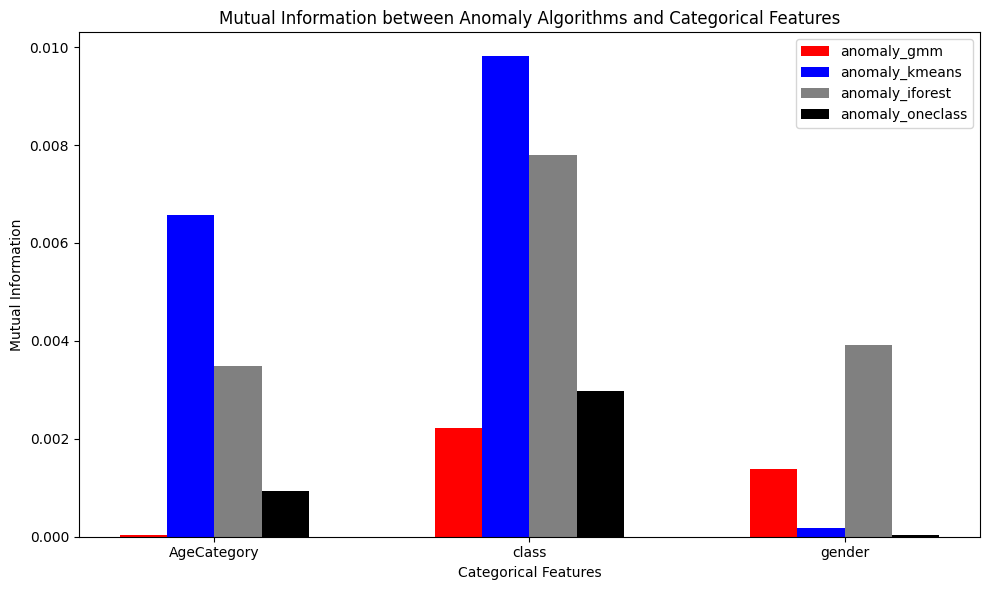

In [46]:
# prompt: תעשה גרף של אינפורמציה הדדית בין כל אלגוריתם לזיהוי אנומליות בנפרד
# בעמודה של שלושת המשתנים הקטגוריים במאגר נתונים - גיל, רמה, מגדר
# האלגוריתמים:
# gmm
# k-mens
# isolate forest
# one class svm
# והמשתנים שמכילים את נתוני האנומליות מהקודים האחרונים
# התוך המאגר החדש
# X_scaled_with_anomaly
# אלו המשתנים
# anomaly_gmm
# anomaly_kmens
# anomaly_iforest
# anomaly_oneclass

import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score

# Assuming X_scaled_with_anomaly, categorical_features, and new_df are defined

colors = {
    'anomaly_kmeans': 'blue',
    'anomaly_gmm': 'red',
    'anomaly_iforest': 'gray',
    'anomaly_oneclass': 'black'
}

categorical_cols = ['AgeCategory', 'class', 'gender']  # Replace with your actual categorical column names

algorithms = ['anomaly_gmm', 'anomaly_kmeans', 'anomaly_iforest', 'anomaly_oneclass']
mutual_info_values = {}

for algorithm in algorithms:
    mutual_info_values[algorithm] = {}
    for col in categorical_cols:
      mi = mutual_info_score(X_scaled_with_anomaly[algorithm], new_df[col])
      mutual_info_values[algorithm][col] = mi

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.15
index = range(len(categorical_cols))

for i, algorithm in enumerate(algorithms):
  values = [mutual_info_values[algorithm][col] for col in categorical_cols]
  plt.bar([x + i * bar_width for x in index], values, bar_width, label=algorithm, color=colors[algorithm])

plt.xlabel("Categorical Features")
plt.ylabel("Mutual Information")
plt.title("Mutual Information between Anomaly Algorithms and Categorical Features")
plt.xticks([x + bar_width * (len(algorithms) -1) / 2 for x in index], categorical_cols)
plt.legend()
plt.tight_layout()
plt.show()


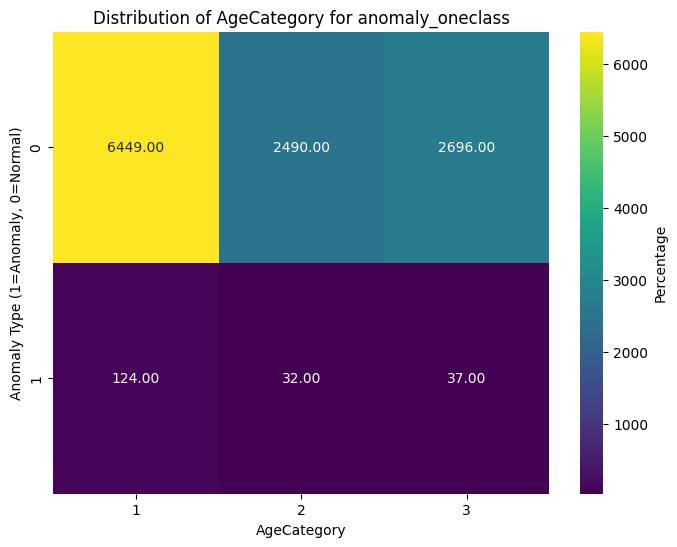

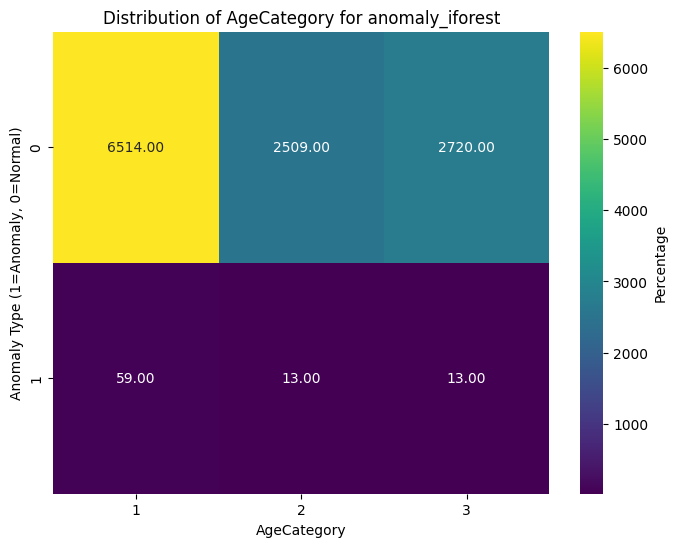

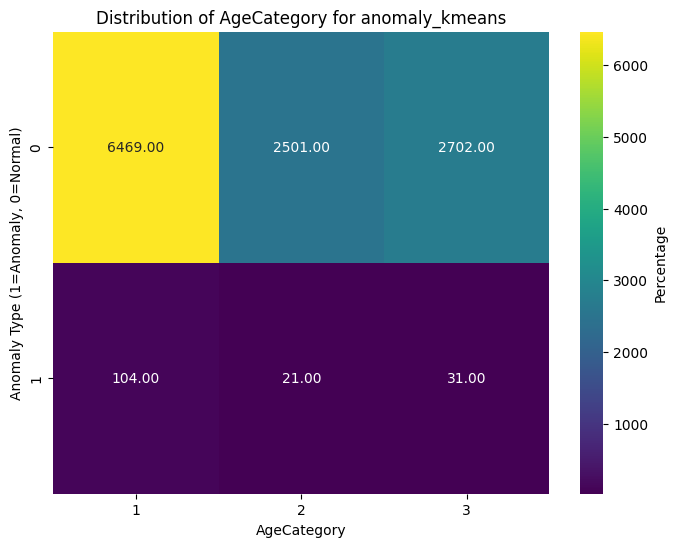

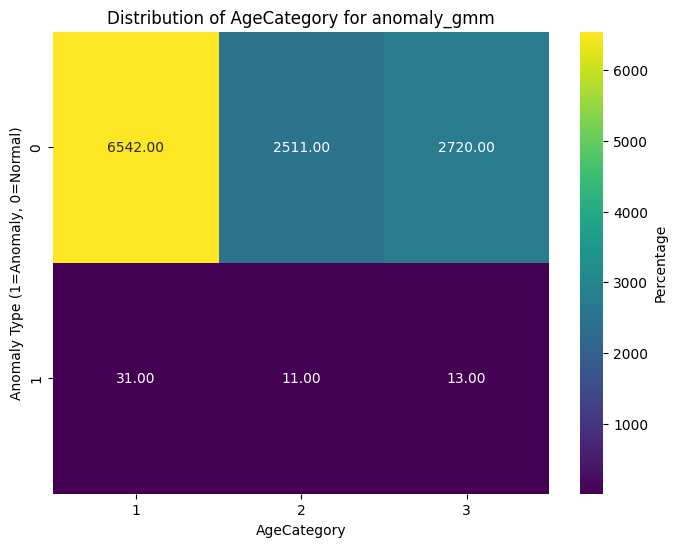

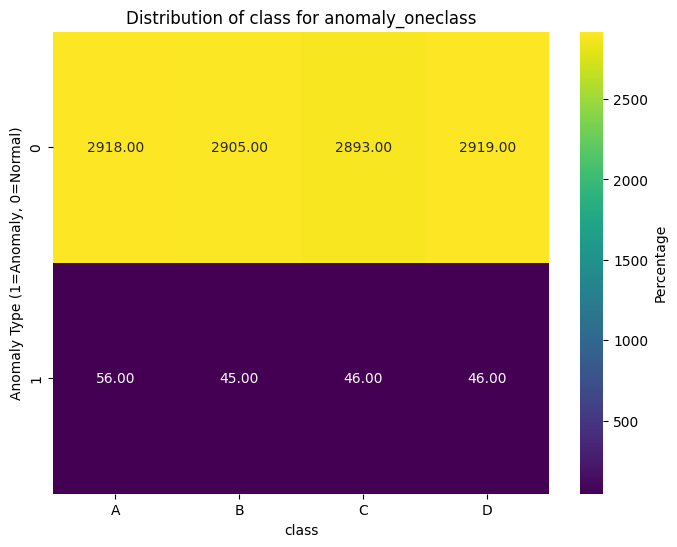

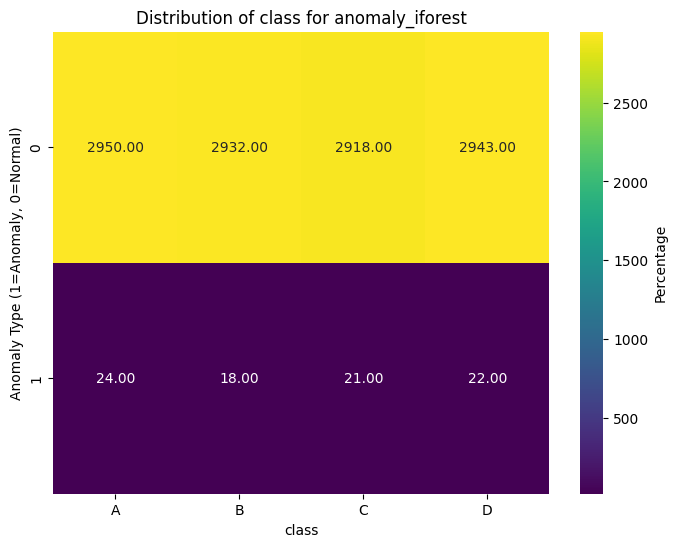

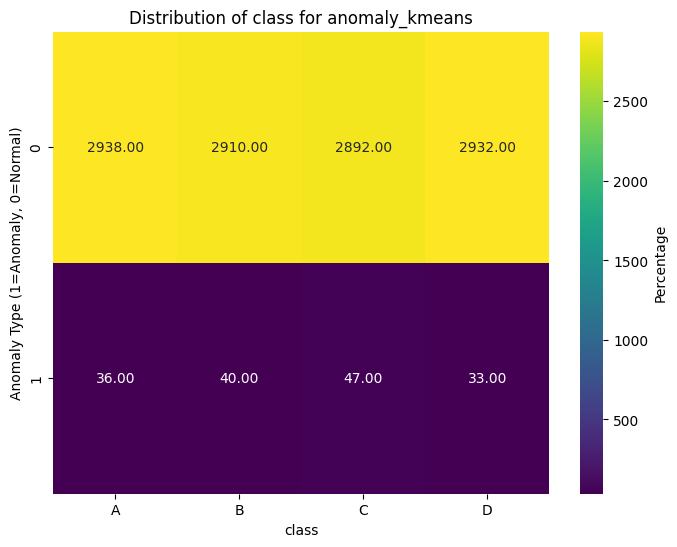

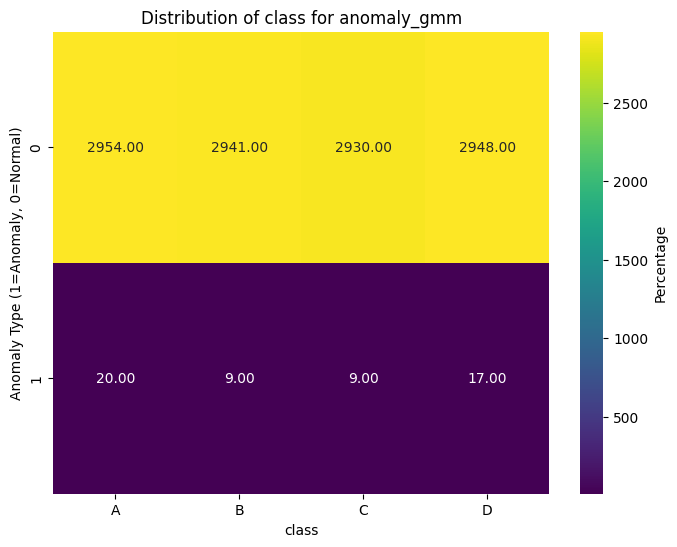

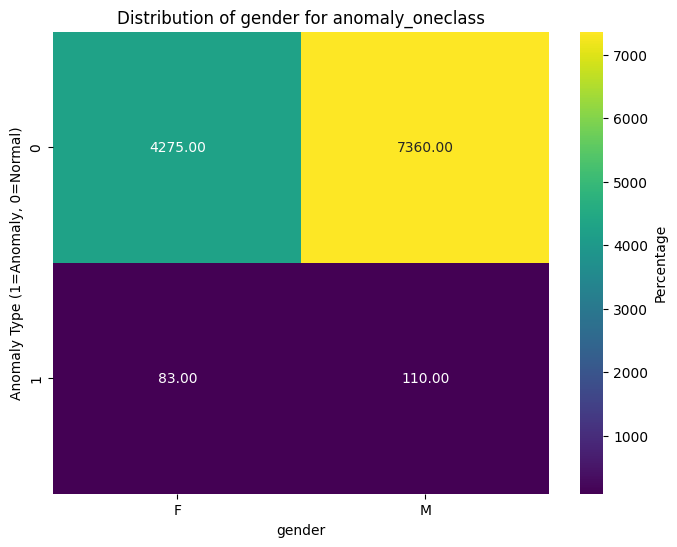

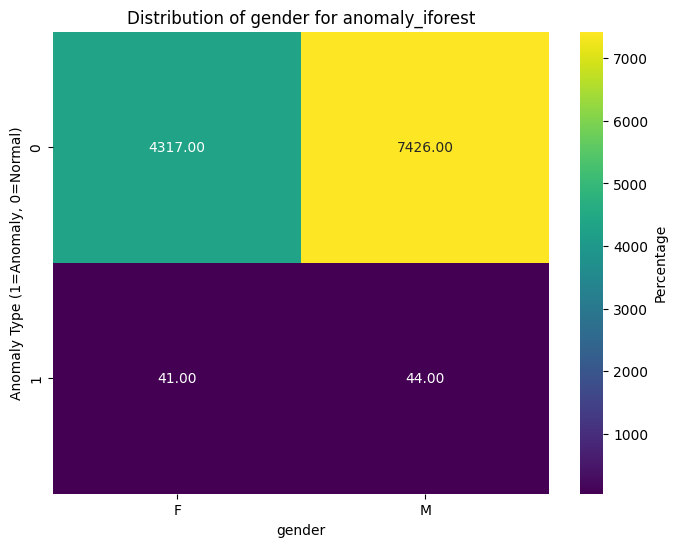

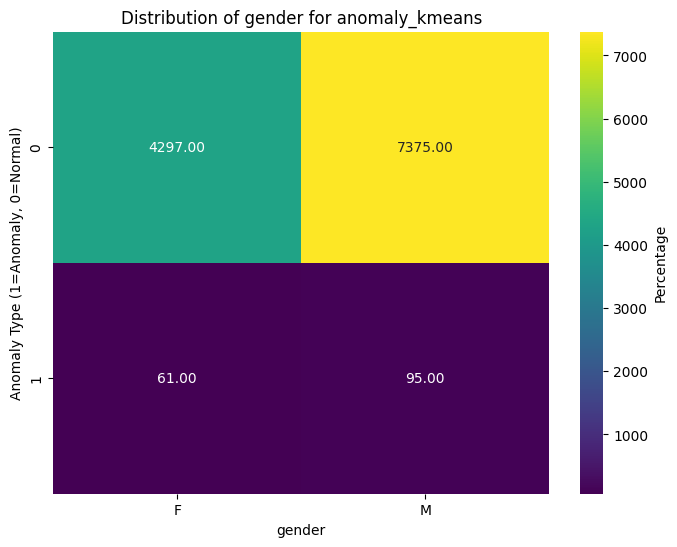

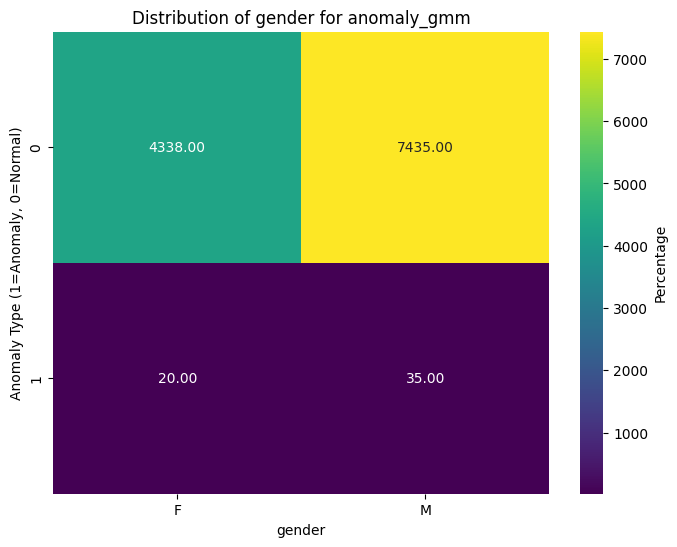

In [43]:
# prompt: תיקח את
# X_scaled_with_anomaly
# ואת המשתנים
# anomaly_oneclass
# anomaly_iforest
# ותראה בגרף ריבועי
# איך נראית ההתפלגות המשותפת של כל משתנה בנפרד
# עם כל אחד מהמשתנים הקטגוריים בנפרד
# גיל, רמה, מגדר
# תשתמש בcrosstab

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_scaled_with_anomaly, anomaly_oneclass, and anomaly_iforest are defined
# and new_df contains the original data with 'age', 'level', and 'gender' columns.

categorical_cols = ['AgeCategory', 'class', 'gender']

for col in categorical_cols:
  # Create the crosstab
  for anomaly_type in ['anomaly_oneclass', 'anomaly_iforest','anomaly_kmeans', 'anomaly_gmm']:
    crosstab_data = pd.crosstab(X_scaled_with_anomaly[anomaly_type], new_df[col])

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab_data, annot=True, cmap='viridis', fmt=".2f", cbar_kws={'label': 'Percentage'})
    plt.title(f'Distribution of {col} for {anomaly_type}')
    plt.xlabel(col)
    plt.ylabel('Anomaly Type (1=Anomaly, 0=Normal)')
    plt.show()


<ipython-input-353-fe6a09fab92b>:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels)) # Use a colormap for distinct colors


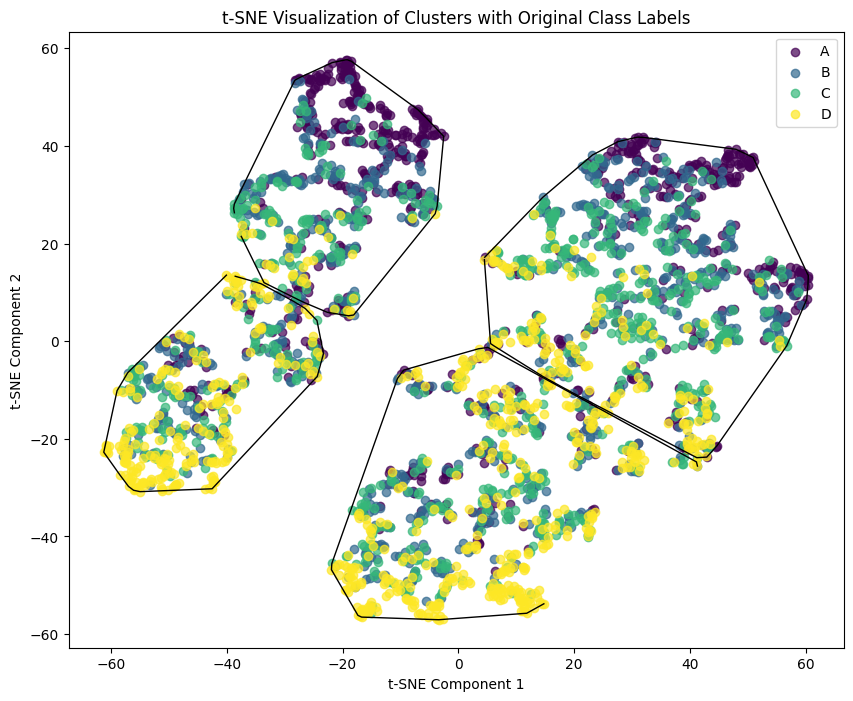

In [353]:
# prompt: תיקח באקראי רבע מהנתונים
# תפעיל
# tsne
# אחרי pca
# על 4 קלאסטרים
# תציג בגרף הנקודות עצמן לפי צבעים שמסמנים את ה
# class
# המקורי
# שיהיה בצורה ברורה ומובנת, צבעים חדים
# ותתחום בעקומה את כל אחד מהאשכולות
# בנפרד!
# שההבדל בין האשכולות יהיה ברור

from sklearn.manifold import TSNE

# Assuming X_scaled and kmeans_labels are defined from the previous code block
# and you want to visualize the first group (index 0)

# Select a quarter of the data randomly
random_indices = np.random.choice(len(X_scaled), size=len(X_scaled)//4, replace=False)
X_subset = X_scaled[random_indices]
original_labels_subset = new_df['class'].iloc[random_indices]


# Apply PCA
X_pca = PCA(n_components=2).fit_transform(X_subset)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)


# KMeans clustering on t-SNE results
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tsne)

# Create the plot
plt.figure(figsize=(10, 8))

unique_labels = np.unique(original_labels_subset)
colors = plt.cm.get_cmap('viridis', len(unique_labels)) # Use a colormap for distinct colors


for label in unique_labels:
    indices = original_labels_subset == label
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=label, color=colors(np.where(unique_labels==label)[0][0]), alpha=0.7)

#Plot cluster boundaries with convex hulls
from scipy.spatial import ConvexHull

for cluster_label in range(4):
    cluster_indices = kmeans_labels == cluster_label
    cluster_points = X_tsne[cluster_indices]
    hull = ConvexHull(cluster_points)
    plt.plot(cluster_points[hull.vertices, 0], cluster_points[hull.vertices, 1], 'k-', linewidth=1)


plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Clusters with Original Class Labels")
plt.legend()
plt.show()


<ipython-input-357-3c001efe6863>:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels))


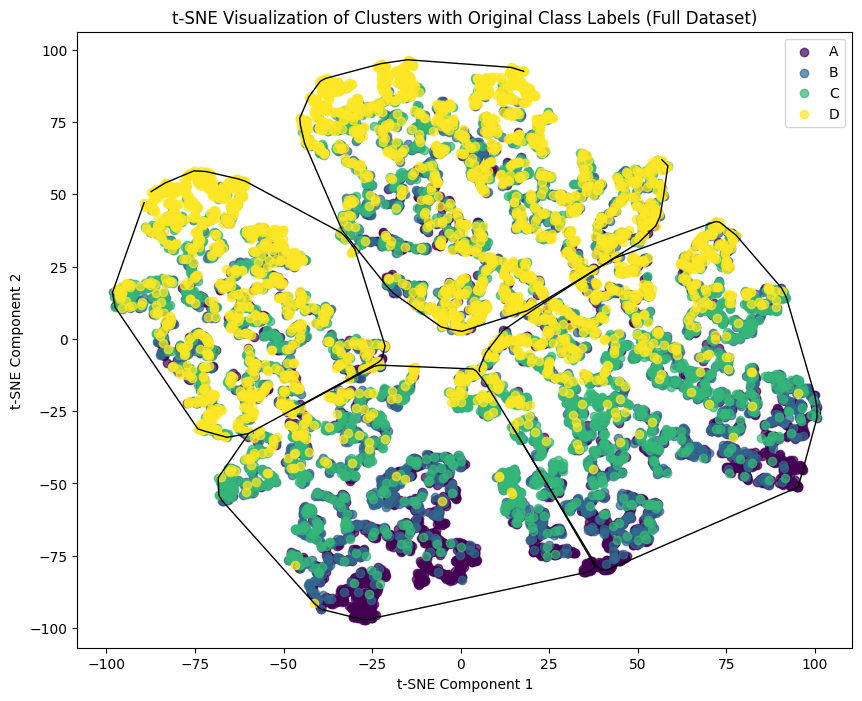

In [357]:
# prompt: תעשה למאגר נתונים
# השלם
# tsne
# עבור k means
# 4 קלאסטרים
# ו2 מימדים בpca
# לא לחלק ב4 את המאגר
# להריץ על מאגר שלם

from scipy.spatial import ConvexHull

# Assuming X_scaled and new_df are defined from the previous code block

# Apply PCA
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# KMeans clustering on t-SNE results
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tsne)

# Create the plot
plt.figure(figsize=(10, 8))

# Original class labels
unique_labels = np.unique(new_df['class'])
colors = plt.cm.get_cmap('viridis', len(unique_labels))

for label in unique_labels:
    indices = new_df['class'] == label
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=label, color=colors(np.where(unique_labels==label)[0][0]), alpha=0.7)

# Plot cluster boundaries with convex hulls
for cluster_label in range(4):
    cluster_indices = kmeans_labels == cluster_label
    cluster_points = X_tsne[cluster_indices]
    hull = ConvexHull(cluster_points)
    plt.plot(cluster_points[hull.vertices, 0], cluster_points[hull.vertices, 1], 'k-', linewidth=1)

plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Clusters with Original Class Labels (Full Dataset)")
plt.legend()
plt.show()
